In [85]:
from run import SphersVoronoi
import random
import numpy as np
from convert_la import convert_la, calculate_center, calculate_weighted_center
import matplotlib.pyplot as plt
from math import radians, sin, cos, sqrt, atan2

In [86]:
def haversine(coord1, coord2):
    # 将经纬度转换成弧度
    lon1, lat1 = map(radians, coord1)
    lon2, lat2 = map(radians, coord2)

    # Haversine公式
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    # 地球平均半径，单位为公里
    R = 6371.0
    distance = R * c

    return distance

def quadrilateral_area(coords):
    # 计算四边形对角线，将其分为两个三角形
    diag1 = haversine(coords[0], coords[2])
    diag2 = haversine(coords[1], coords[3])

    # 计算四边形四条边的长度
    side1 = haversine(coords[0], coords[1])
    side2 = haversine(coords[1], coords[2])
    side3 = haversine(coords[2], coords[3])
    side4 = haversine(coords[3], coords[0])

    # 使用海伦公式计算每个三角形的面积
    # 海伦公式: area = sqrt(s * (s - a) * (s - b) * (s - c))
    # 其中 s 是半周长，a、b、c 是三角形的边长
    s1 = (side1 + side2 + diag1) / 2
    area1 = sqrt(s1 * (s1 - side1) * (s1 - side2) * (s1 - diag1))

    s2 = (side3 + side4 + diag1) / 2
    area2 = sqrt(s2 * (s2 - side3) * (s2 - side4) * (s2 - diag1))

    # 将两个三角形的面积相加得到四边形的总面积
    total_area = area1 + area2

    return total_area

In [87]:
n = 8 # 层数
size = 2 ** n + 1 # 边长
seed_num = 200 # 种子点数量
# 颜色
colors = [[0, 0, 0]] + [[random.randrange(99, 206) for _ in range(3)] for _ in range(seed_num)] # 随机颜色列表
seed_list = [convert_la(n, [random.randrange(size), random.randrange(size)]) for _ in range(seed_num)] # 种子点列表

In [88]:
v = SphersVoronoi(n, seed_list)

In [89]:
data = v.coordinate_table
len(data[0]), len(data)

(257, 257)

In [90]:
def four(data):
    res = []
    n = len(data)
    for i in range(n-1):
        for j in range(n-1):
            res.append((data[i][j][1], [data[i][j], data[i][j+1], data[i+1][j+1], data[i+1][j]]))
    return res

In [91]:
data_four = four(data)
# 按data_four[][0]排序
data_four = sorted(data_four, key=lambda x: x[0])
data_four[0]

(-90.0,
 [[0.0, -90.0],
  [-90.0, -89.296875],
  [-135.0, -88.59375],
  [-180.0, -89.296875]])

In [92]:
# 计算每个四边形的面积
areas = []
for i in range(len(data_four)):
    areas.append([data_four[i][0], quadrilateral_area(data_four[i][1])])

In [93]:
# 只选取areas[][0]中大于等于0的数据
areas = [i for i in areas if i[0] >= 0]

In [94]:
areas[0], areas[-1]

([0.0, 3922.043636828403], [90.0, 8644.395053925578])

In [95]:
areas = [[item[0], item[1]/3922.043636828403] for item in areas]
areas

[[0.0, 1.0],
 [0.0, 1.007835105016066],
 [0.0, 1.0157453132824834],
 [0.0, 1.0238297706851167],
 [0.0, 1.0317323933605738],
 [0.0, 1.0400719335994086],
 [0.0, 1.0479604679532635],
 [0.0, 1.0565607905247973],
 [0.0, 1.0644283363123592],
 [0.0, 1.0902731094270819],
 [0.0, 1.0980763183665048],
 [0.0, 1.107492600242151],
 [0.0, 1.1152515980157454],
 [0.0, 1.1249507726634946],
 [0.0, 1.1326569342528066],
 [0.0, 1.142644248638454],
 [0.0, 1.1502884866620697],
 [0.0, 1.1605690259423653],
 [0.0, 1.168141779673486],
 [0.0, 1.1970931203245063],
 [0.0, 1.2044922812901044],
 [0.0, 1.215680957552532],
 [0.0, 1.2229770185246118],
 [0.0, 1.2344770548782444],
 [0.0, 1.241658475077015],
 [0.0, 1.2534736904699517],
 [0.0, 1.260528419931996],
 [0.0, 1.2726622752815888],
 [0.0, 1.279577752947078],
 [0.0, 1.2920333118030998],
 [0.0, 1.2987964658929165],
 [0.0, 1.3115763532984994],
 [0.0, 1.3181736042352186],
 [0.0, 1.3312799638708288],
 [0.0, 1.3376972300039414],
 [0.0, 1.35113167972349],
 [0.0, 1.35735438

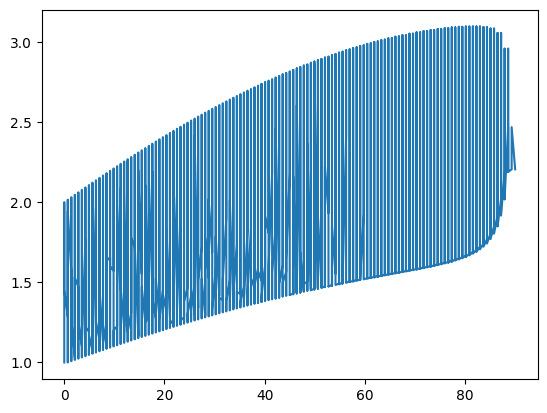

In [96]:
# 以areas[][0]为x轴，areas[][1]为y轴画一个折线图
plt.plot([i[0] for i in areas], [i[1] for i in areas])